In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Note: you may need to restart the kernel to use updated packages.


## Import, types and structure of data

In [2]:
df = pd.read_csv('/kaggle/input/ecommerce-customer-service-satisfaction/Customer_support_data.csv')
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [3]:
df.shape

(85907, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

## Cleaning Data

In [5]:
df.isna().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

In [6]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [7]:
df = df.drop(columns=['Unique id','Order_id','connected_handling_time'])

In [8]:
df = df.dropna(how='any')
df.isna().sum()

channel_name            0
category                0
Sub-category            0
Customer Remarks        0
order_date_time         0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Customer_City           0
Product_category        0
Item_price              0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
dtype: int64

In [9]:
df.shape

(5784, 17)

# EDA

In [10]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.describe()

,Item_price,CSAT Score
count,5784.000000,5784.000000
mean,5810.067427,3.717669
std,12924.031171,1.750964
min,1.000000,1.000000
25%,399.000000,1.000000
50%,999.000000,5.000000
75%,2999.000000,5.000000
max,159990.000000,5.000000


## Most Common Values

In [11]:
for col in df.columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts().head())
    print("-" * 30)

Value counts for column 'channel_name':
channel_name
Inbound    4656
Outcall     747
Email       381
Name: count, dtype: int64
------------------------------
Value counts for column 'category':
category
Returns           2873
Order Related     2022
Refund Related     387
Cancellation       267
Feedback           182
Name: count, dtype: int64
------------------------------
Value counts for column 'Sub-category':
Sub-category
Reverse Pickup Enquiry    1360
Delayed                   1108
Return request             647
Order status enquiry       530
Not Needed                 253
Name: count, dtype: int64
------------------------------
Value counts for column 'Customer Remarks':
Customer Remarks
Good          284
Good          214
Very good     115
Ok             58
Nice           56
Name: count, dtype: int64
------------------------------
Value counts for column 'order_date_time':
order_date_time
05/08/2023 13:07    5
05/08/2023 21:13    4
04/08/2023 15:23    4
09/08/2023 11:55    4
04/08

/tmp/ipykernel_17/2152733876.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date_time'] = pd.to_datetime(df['order_date_time'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='order_count'>

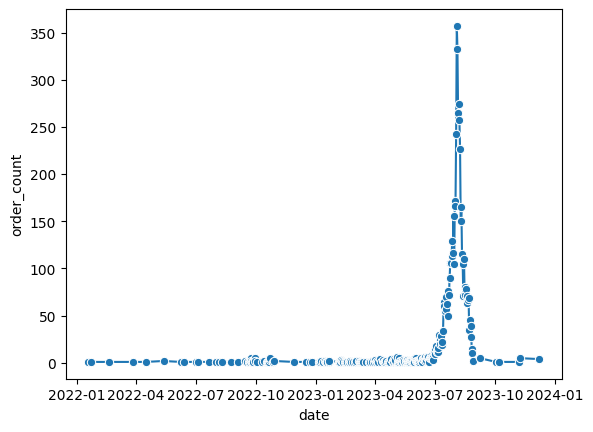

In [12]:
df['order_date_time'] = pd.to_datetime(df['order_date_time'])
df['date'] = df['order_date_time'].dt.date 
order_counts = df.groupby('date').size().reset_index(name='order_count')
sns.lineplot(data=order_counts, x='date', y='order_count', marker='o')

/tmp/ipykernel_17/1402315873.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  AVG_ItemPrice_Date = df.groupby(pd.Grouper(key='order_date_time', freq='M'))['Item_price'].mean().reset_index(name='AVG Item Price')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='order_date_time', ylabel='AVG Item Price'>

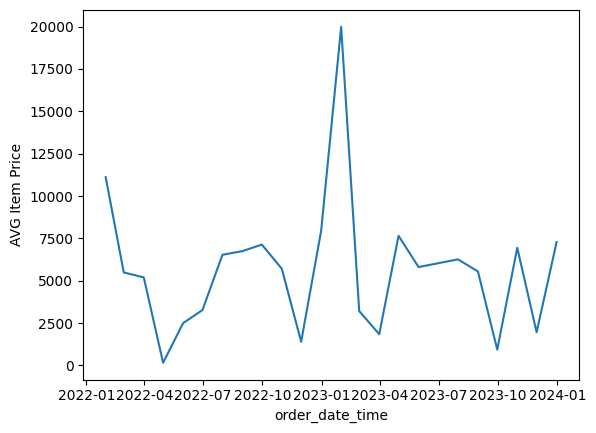

In [13]:
AVG_ItemPrice_Date = df.groupby(pd.Grouper(key='order_date_time', freq='M'))['Item_price'].mean().reset_index(name='AVG Item Price')
sns.lineplot(data = AVG_ItemPrice_Date, x = 'order_date_time', y = 'AVG Item Price')

## Analiza Average CSAT Score według różnych wymiarów

### Daty

/tmp/ipykernel_17/2271734462.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Survey_response_Date', ylabel='Average CSAT Score'>

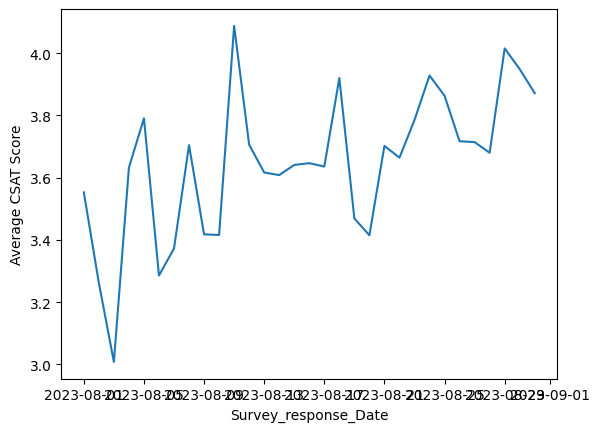

In [14]:
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'])
CSAT_over_date = df.groupby('Survey_response_Date')['CSAT Score'].mean().reset_index(name='Average CSAT Score')
sns.lineplot(data=CSAT_over_date, x='Survey_response_Date',y='Average CSAT Score',markers = 'o')

### Top and Bottom Agents, Supervisors and Managers

In [15]:
avg_csat_by_agent = df.groupby('Agent_name').agg(Average_CSAT =('CSAT Score','mean'),Number_Of_Responds=('CSAT Score', 'count')).reset_index()
top_agents = avg_csat_by_agent.sort_values(by='Average_CSAT', ascending=False)
top_agents = top_agents[top_agents['Number_Of_Responds'] >= 10]
top_agents.head(10)

,Agent_name,Average_CSAT,Number_Of_Responds
1135,Susan Francis,5.000000,10
791,Matthew White PhD,4.941176,17
956,Paula Castillo,4.933333,15
128,Brandon Frost,4.833333,12
343,Edward Taylor,4.692308,13
45,Amy Berry,4.666667,12
1252,William Carey DVM,4.636364,11
333,Dr. Heather Lewis,4.636364,11
491,Jennifer Hernandez,4.615385,13
122,Bonnie Durham,4.600000,10


In [16]:
avg_csat_by_agent = df.groupby('Agent_name').agg(Average_CSAT =('CSAT Score','mean'),Number_Of_Responds=('CSAT Score', 'count')).reset_index()
bot_agents = avg_csat_by_agent.sort_values(by='Average_CSAT', ascending=True)
bot_agents = bot_agents[bot_agents['Number_Of_Responds'] >= 10]
bot_agents.head(10)

,Agent_name,Average_CSAT,Number_Of_Responds
461,Jamie Smith,2.347826,23
745,Mackenzie Scott MD,2.363636,11
291,David Steele,2.500000,10
698,Laura Allen,2.583333,12
1146,Tammy Garcia,2.636364,11
1098,Stacey Lynch,2.900000,10
256,Dakota Collins,2.900000,10
15,Alexa Mcpherson,2.923077,13
1087,Sheila Collins,2.928571,14
152,Brittany Nunez,3.076923,13


In [17]:
avg_csat_by_manager = df.groupby('Manager').agg(Average_CSAT =('CSAT Score','mean'),Number_Of_Responds=('CSAT Score', 'count')).reset_index()
top_managers = avg_csat_by_manager.sort_values(by='Average_CSAT', ascending=False)
top_managers = top_managers[top_managers['Number_Of_Responds'] >= 10]
top_managers.head(10) # JEST TYLKO 5 Managerów

,Manager,Average_CSAT,Number_Of_Responds
0,Emily Chen,3.966738,932
3,Michael Lee,3.781043,1361
2,John Smith,3.715778,1819
4,Olivia Tan,3.658915,258
5,William Kim,3.523909,481
1,Jennifer Nguyen,3.496249,933


In [18]:
avg_csat_by_supervisor = df.groupby('Supervisor').agg(Average_CSAT =('CSAT Score','mean'),Number_Of_Responds=('CSAT Score', 'count')).reset_index()
top_supervisors = avg_csat_by_supervisor.sort_values(by='Average_CSAT', ascending=False)
top_supervisors = top_supervisors[top_supervisors['Number_Of_Responds'] >= 10]
top_supervisors.head(10)

,Supervisor,Average_CSAT,Number_Of_Responds
17,Isabella Wong,4.400000,65
6,Brayden Wong,4.128655,171
21,Layla Taniguchi,4.105263,57
3,Amelia Tanaka,4.084906,106
33,Olivia Wang,4.070312,128
10,Elijah Yamaguchi,4.023166,259
25,Madison Kim,4.019231,208
36,Sophia Sato,3.982143,112
13,Ethan Nakamura,3.979798,99
19,Jacob Sato,3.950495,101


In [19]:
bot_supervisors = avg_csat_by_supervisor.sort_values(by='Average_CSAT', ascending=True)
bot_supervisors = bot_supervisors[bot_supervisors['Number_Of_Responds'] >= 10]
bot_supervisors.head(10)

,Supervisor,Average_CSAT,Number_Of_Responds
31,Oliver Nguyen,2.388889,36
16,Harper Wong,3.097826,92
39,Zoe Yamamoto,3.139344,244
35,Sophia Chen,3.266667,15
24,Lucas Singh,3.271605,81
12,Emma Park,3.275000,240
38,Wyatt Kim,3.421053,114
8,Charlotte Suzuki,3.472222,72
5,Ava Wong,3.508108,185
26,Mason Gupta,3.527778,144


### Top and Bot 10 Cities, Shifts, Categories, Sub-categories and Product-category

In [20]:
avg_csat_by_city = df.groupby('Customer_City').agg(Average_CSAT =('CSAT Score','mean'),Number_Of_Responds=('CSAT Score', 'count')).reset_index()
top_cities = avg_csat_by_city.sort_values(by='Average_CSAT', ascending=False)
top_cities = top_cities[top_cities['Number_Of_Responds'] >= 10]
top_cities.head(10)

,Customer_City,Average_CSAT,Number_Of_Responds
951,SAMBALPUR,5.000000,10
146,BERHAMPUR,5.000000,10
60,ARRAH,4.923077,13
922,REWARI,4.818182,11
939,SAHARSA,4.631579,19
174,BHOPAL,4.615385,13
95,BALLIA,4.545455,11
93,BALESHWAR,4.529412,17
131,BASTI,4.500000,10
345,FATEHPUR,4.500000,12


In [21]:
bot_cities = avg_csat_by_city.sort_values(by='Average_CSAT', ascending=True)
bot_cities = bot_cities[bot_cities['Number_Of_Responds'] >= 10]
bot_cities.head(10)

,Customer_City,Average_CSAT,Number_Of_Responds
355,GANDHINAGAR,2.454545,11
1125,VADODARA,2.533333,30
125,BARMER,2.700000,10
1131,VAPI,2.700000,10
172,BHIWANDI,2.750000,12
882,RAIPUR,2.857143,14
132,BATHINDA,2.909091,11
13,AJMER,3.000000,10
371,GHAZIABAD,3.000000,40
237,CHENNAI,3.023810,84


In [22]:
avg_csat_by_shift = df.groupby('Agent Shift').agg(Average_CSAT =('CSAT Score','mean'),Number_Of_Responds=('CSAT Score', 'count')).reset_index()
top_shifts = avg_csat_by_shift.sort_values(by='Average_CSAT', ascending=False)
top_shifts = top_shifts[top_shifts['Number_Of_Responds'] >= 10]
top_shifts.head(10)

,Agent Shift,Average_CSAT,Number_Of_Responds
4,Split,4.004566,219
3,Night,3.886598,97
0,Afternoon,3.836842,380
1,Evening,3.730144,2216
2,Morning,3.664694,2872


In [23]:
avg_csat_by_category = df.groupby('category').agg(Average_CSAT =('CSAT Score','mean'),Number_Of_Responds=('CSAT Score', 'count')).reset_index()
top_categories = avg_csat_by_category.sort_values(by='Average_CSAT', ascending=False)
top_categories = top_categories[top_categories['Number_Of_Responds'] >= 10]
top_categories.head(10)

,category,Average_CSAT,Number_Of_Responds
8,Returns,3.881657,2873
7,Refund Related,3.736434,387
2,Offers & Cashback,3.642857,14
3,Order Related,3.586053,2022
5,Payments related,3.500000,16
1,Feedback,3.450549,182
0,Cancellation,3.191011,267
4,Others,3.166667,12


In [24]:
avg_csat_by_sub_category = df.groupby('Sub-category').agg(Average_CSAT =('CSAT Score','mean'),Number_Of_Responds=('CSAT Score', 'count')).reset_index()
top_sub_categories = avg_csat_by_sub_category.sort_values(by='Average_CSAT', ascending=False)
top_sub_categories = top_sub_categories[top_sub_categories['Number_Of_Responds'] >= 10]
top_sub_categories.head(10)

,Sub-category,Average_CSAT,Number_Of_Responds
26,Return cancellation,4.642857,14
14,Missing,4.519380,129
27,Return request,4.446677,647
9,Fraudulent User,4.295547,247
36,Unable to track,4.235294,17
5,Customer Requested Modifications,4.076923,26
39,Wrong,4.000000,188
24,Refund Enquiry,3.927184,206
22,Priority delivery,3.916667,84
17,Order status enquiry,3.803774,530


In [25]:
avg_csat_by_sub_category = df.groupby('Sub-category').agg(Average_CSAT =('CSAT Score','mean'),Number_Of_Responds=('CSAT Score', 'count')).reset_index()
bot_sub_categories = avg_csat_by_sub_category.sort_values(by='Average_CSAT', ascending=True)
bot_sub_categories = bot_sub_categories[bot_sub_categories['Number_Of_Responds'] >= 10]
bot_sub_categories.head(10)

,Sub-category,Average_CSAT,Number_Of_Responds
34,Technician Visit,2.108696,46
10,General Enquiry,2.578947,19
8,Exchange / Replacement,3.046154,65
15,Not Needed,3.110672,253
11,Installation/demo,3.242938,177
35,UnProfessional Behaviour,3.450549,182
29,Seller Cancelled Order,3.451613,31
7,Delayed,3.500000,1108
25,Refund Related Issues,3.547486,179
6,Damaged,3.580645,31


In [26]:
avg_csat_by_product_category = df.groupby('Product_category').agg(Average_CSAT =('CSAT Score','mean'),Number_Of_Responds=('CSAT Score', 'count')).reset_index()
top_product_categories = avg_csat_by_product_category.sort_values(by='Average_CSAT', ascending=False)
top_product_categories = top_product_categories[top_product_categories['Number_Of_Responds'] >= 10]
top_product_categories.head(10)

,Product_category,Average_CSAT,Number_Of_Responds
0,Affiliates,4.120690,58
7,LifeStyle,3.941221,1327
2,Electronics,3.902265,1678
1,Books & General merchandise,3.764098,1064
5,Home,3.521628,393
6,Home Appliences,3.322034,472
8,Mobile,3.228013,614
3,Furniture,3.075581,172


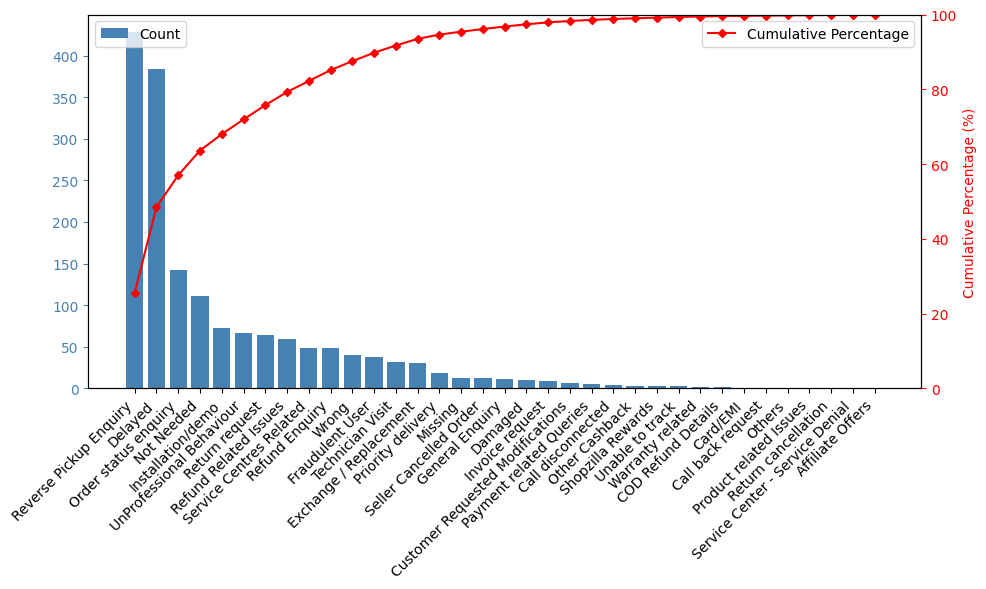

In [27]:

dissatisfied_df = df[df['CSAT Score'] < 3]
sub_category_counts = dissatisfied_df['Sub-category'].value_counts().reset_index()
sub_category_counts.columns = ['Sub-category', 'count']
sub_category_counts['cumulative_percentage'] = sub_category_counts['count'].cumsum() / sub_category_counts['count'].sum() * 100
sub_category_counts = sub_category_counts.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(sub_category_counts['Sub-category'], sub_category_counts['count'], color='steelblue', label='Count')

ax2 = ax.twinx()
ax2.plot(
    range(len(sub_category_counts)),
    sub_category_counts['cumulative_percentage'], 
    color='red', 
    marker="D", 
    ms=4,
    label='Cumulative Percentage'
)

ax2.set_ylim(0, 100)
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
ax.set_xticks(range(len(sub_category_counts)))
ax.set_xticklabels(sub_category_counts['Sub-category'], rotation=45, ha='right')
ax.tick_params(axis='y', colors='steelblue')
ax2.tick_params(axis='y', colors='red')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


/tmp/ipykernel_17/1911820419.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(category_counts['category'], rotation=45, ha='right')


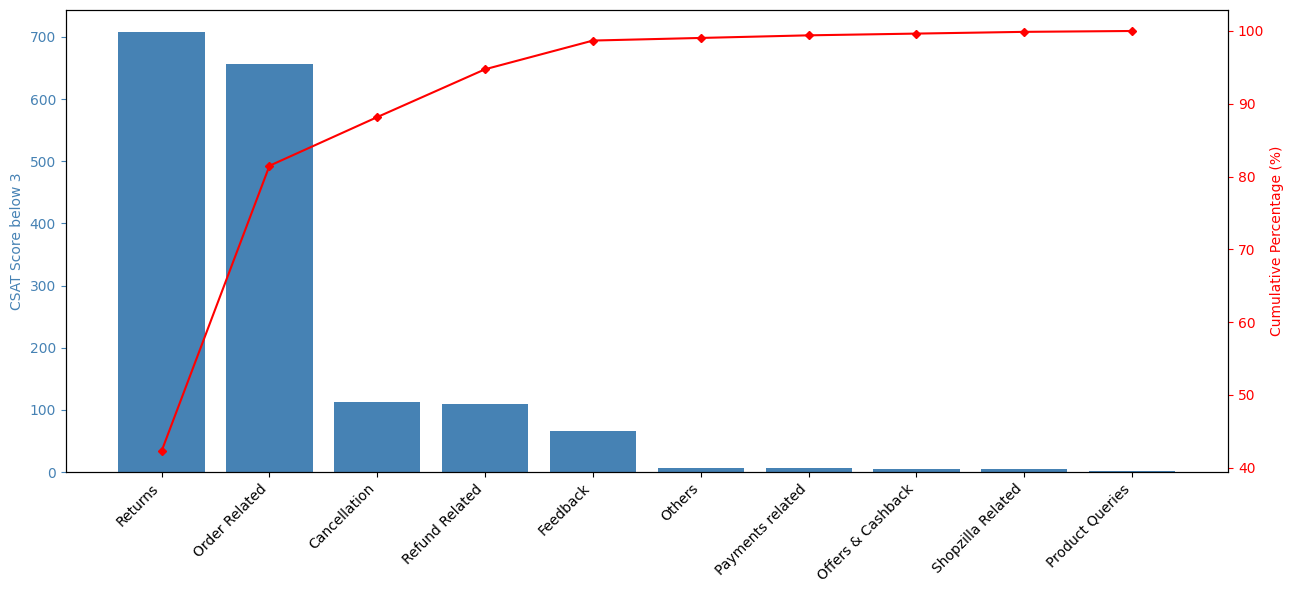

In [28]:
#PARETO for category
dissatisfied_df = df[df['CSAT Score'] < 3]
category_counts = dissatisfied_df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']
category_counts = category_counts.sort_values(by='count', ascending=False)

category_counts['cumulative_percentage'] = (
    category_counts['count'].cumsum() / category_counts['count'].sum()
) * 100

color1 = 'steelblue'
color2 = 'red'
line_size = 4

fig, ax = plt.subplots(figsize=(15, 6))  
ax.bar(category_counts['category'], category_counts['count'], color=color1)

ax2 = ax.twinx()
ax2.plot(
    category_counts.index,  # Użyj indeksu kategorii
    category_counts['cumulative_percentage'], 
    color=color2, 
    marker="D", 
    ms=line_size
)
ax.set_ylabel('CSAT Score below 3', color=color1) 
ax2.set_ylabel('Cumulative Percentage (%)', color=color2) 

ax.set_xticklabels(category_counts['category'], rotation=45, ha='right')

ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

plt.show()